In [18]:
import torch.nn as nn


class VanillaAutoencoder(nn.Module):
    def __init__(self, input_size, latent_dim, hidden_size):
        super(VanillaAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(True),
            nn.Linear(hidden_size, latent_dim),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_size),
            nn.ReLU(True),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Epoch [1/100], Loss: 0.0590
Epoch [2/100], Loss: 0.0560
Epoch [3/100], Loss: 0.0573
Epoch [4/100], Loss: 0.0543
Epoch [5/100], Loss: 0.0551
Epoch [6/100], Loss: 0.0569
Epoch [7/100], Loss: 0.0564
Epoch [8/100], Loss: 0.0557
Epoch [9/100], Loss: 0.0529
Epoch [10/100], Loss: 0.0520
Epoch [11/100], Loss: 0.0531
Epoch [12/100], Loss: 0.0495
Epoch [13/100], Loss: 0.0486
Epoch [14/100], Loss: 0.0486
Epoch [15/100], Loss: 0.0521
Epoch [16/100], Loss: 0.0533
Epoch [17/100], Loss: 0.0501
Epoch [18/100], Loss: 0.0531
Epoch [19/100], Loss: 0.0500
Epoch [20/100], Loss: 0.0497
Epoch [21/100], Loss: 0.0511
Epoch [22/100], Loss: 0.0514
Epoch [23/100], Loss: 0.0531
Epoch [24/100], Loss: 0.0509
Epoch [25/100], Loss: 0.0480
Epoch [26/100], Loss: 0.0496
Epoch [27/100], Loss: 0.0485
Epoch [28/100], Loss: 0.0521
Epoch [29/100], Loss: 0.0486
Epoch [30/100], Loss: 0.0459
Epoch [31/100], Loss: 0.0535
Epoch [32/100], Loss: 0.0514
Epoch [33/100], Loss: 0.0518
Epoch [34/100], Loss: 0.0486
Epoch [35/100], Loss: 0

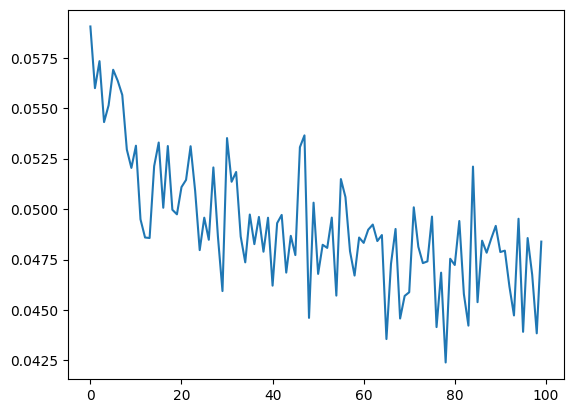

In [19]:
# load MNIST
import torchvision
import torchvision.transforms as transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# Hyper-parameters
input_size = 784
hidden_size = 500
latent_dim = 2
num_epochs = 100
batch_size = 100
learning_rate = 1e-3

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./data/", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="./data/", train=False, transform=transforms.ToTensor()
)

# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

# Device configuration
device = torch.device("mps")

# model
model = VanillaAutoencoder(input_size, latent_dim, hidden_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()  # reconstruction error
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
losses = []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # vectorize images
        images = images.reshape(-1, 28 * 28).to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # print
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

    # save
    losses.append(loss.item())

# plot
plt.plot(losses)

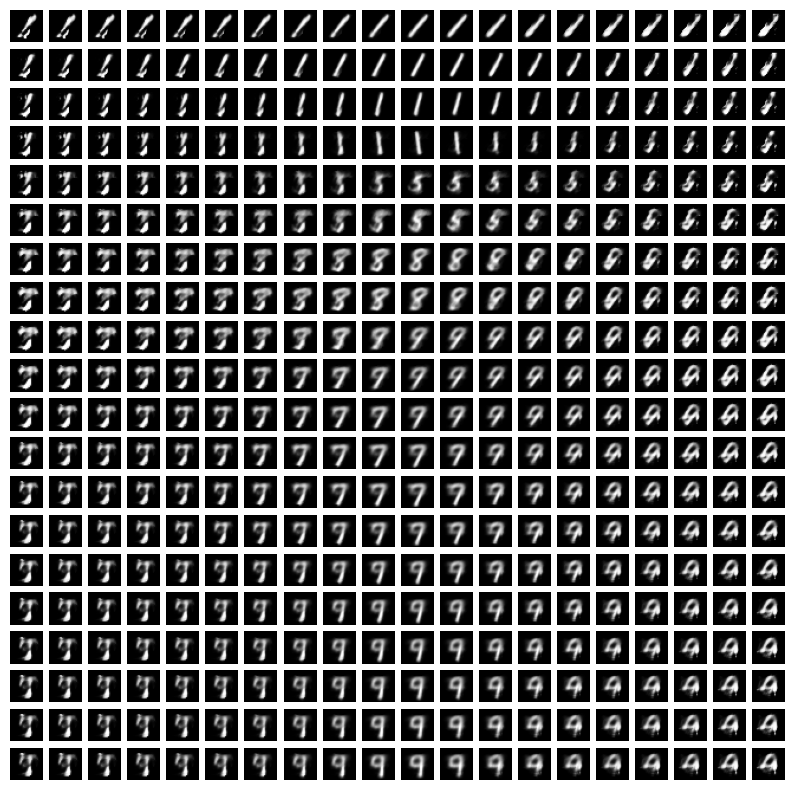

In [23]:
# plot images from the latent space
model.eval()

# put (1, 1) in to the decoder, and plot the output
outputs = []
for i in np.arange(0, 2, 0.1):
    for j in np.arange(-1, 1, 0.1):
        with torch.no_grad():
            z = torch.tensor([i, j], dtype=torch.float32).to(device)
            output = model.decoder(z)
            output = output.reshape(28, 28)
            outputs.append(output.cpu().numpy())


# plot the outputs
fig = plt.figure(figsize=(10, 10))
for i in range(len(outputs)):
    plt.subplot(20, 20, i + 1)
    plt.imshow(outputs[i], cmap="gray")
    plt.axis("off")

# save the figure
plt.savefig("vanilla_autoencoder.png")